In [16]:
import pandas as pd
import numpy as np
import yfinance
import quandl
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis as kurt, norm, skewtest, kurtosistest as kurttest, pearsonr
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


In [17]:
name = 'QCLN'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="1d", start = "2020-10-15", end = "2022-11-26")

df=df["Close"]
df

Date
2020-10-15    50.297020
2020-10-16    50.127705
2020-10-19    50.167545
2020-10-20    50.585857
2020-10-21    48.454453
                ...    
2022-11-18    57.718540
2022-11-21    56.590523
2022-11-22    57.538857
2022-11-23    58.447258
2022-11-25    58.008030
Name: Close, Length: 533, dtype: float64

In [18]:
print(type(df))

<class 'pandas.core.series.Series'>


In [19]:
"""In order to see the table for the dataframe, need to put a break at the line of the DF. And then use a step over (f8) 
to go down the line. And then on the right there should be a view dataframe"""


'In order to see the table for the dataframe, need to put a break at the line of the DF. And then use a step over (f8) \nto go down the line. And then on the right there should be a view dataframe'

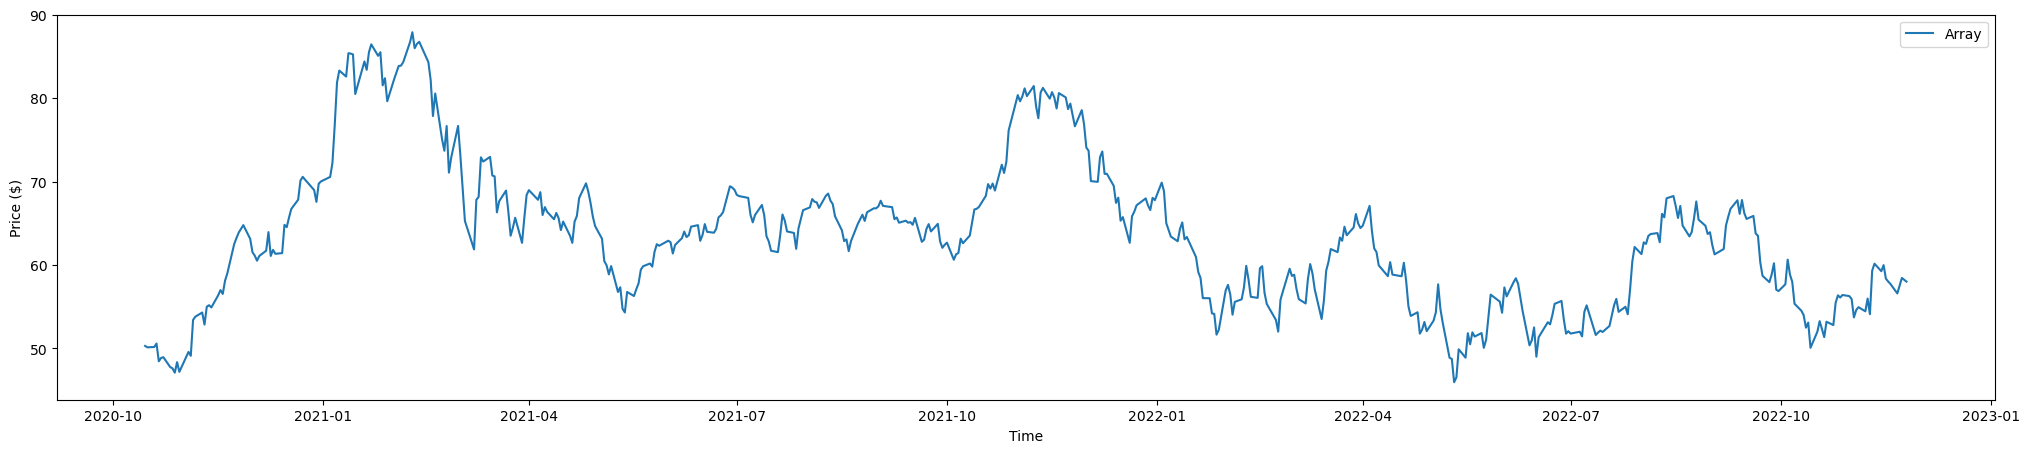

In [20]:
plt.plot(df,label="Array")
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend()
plt.rcParams['figure.figsize'] = [25, 5]
plt.show()


In [21]:
'''pct_change function allows to calculate percent chnage quanitty. Argument is the time lag, which in this case is 1 day'''
'''dropna() drops any NAs that are returned '''

returns = df.pct_change(30).dropna()

'''the [0,10] makes it so returns only fetches from 0-9 in the series, with the 10 being exclusive.
    If I want it to restrict it to that, i need returns=returns[0,10]'''
returns[0:10]

Date
2020-11-27    0.287921
2020-11-30    0.259487
2020-12-01    0.226524
2020-12-02    0.208309
2020-12-03    0.248921
2020-12-04    0.250357
2020-12-07    0.260887
2020-12-08    0.338895
2020-12-09    0.283054
2020-12-10    0.312606
Name: Close, dtype: float64

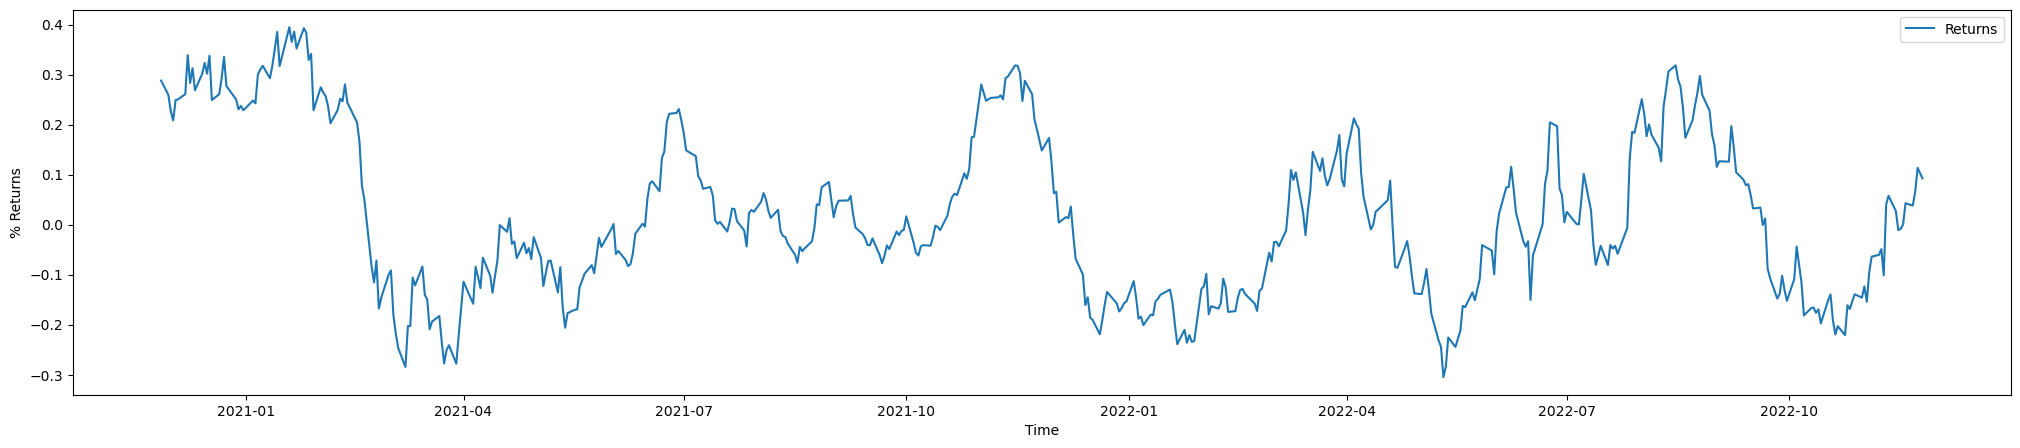

In [22]:
plt.plot(returns,label="Returns")
plt.xlabel("Time")
plt.ylabel("% Returns")
plt.legend()
plt.show()


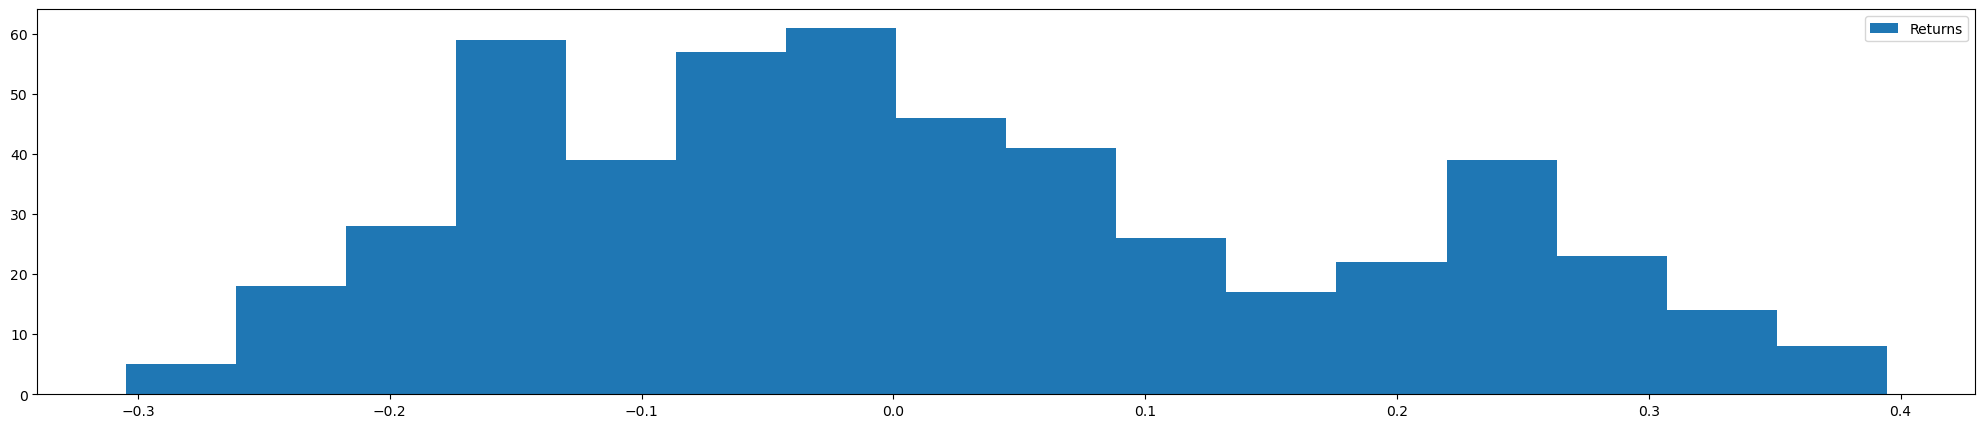

In [23]:
"rice in this case is a bin rule. rice = cube root of the number of observations * 2"
plt.hist(returns,bins="rice", label="Returns")
plt.legend()
plt.show()


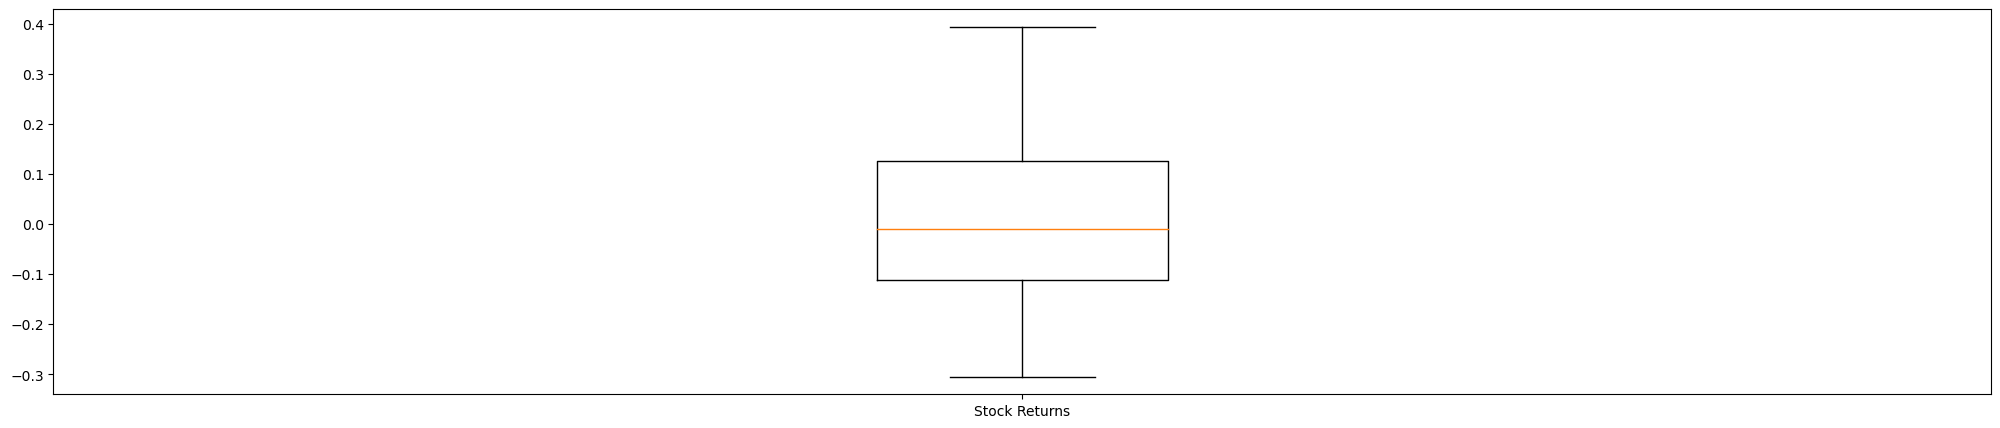

In [24]:
'''why the fuck is this one labels and uses [ ] but the above one is label and doesn't'''
plt.boxplot(returns,labels=["Stock Returns"])
plt.show()


In [25]:
'''ALL THE MEAN, STD, DESCRIBE AND MEIDAN NEED TO BE PRINTED'''
print(returns.describe())
print("mean", np.mean(returns))
print("standard dev", np.std(returns))
'''quantile shows the value at which the dataframe is seperated into the qth quantile'''
print("median", np.quantile(returns,0.5))


count    503.000000
mean       0.015683
std        0.161017
min       -0.304977
25%       -0.112402
50%       -0.009545
75%        0.126227
max        0.394584
Name: Close, dtype: float64
mean 0.01568289917884418
standard dev 0.16085650214614072
median -0.009544565349974055


In [26]:
'''if skew is negative, then left tail, if positive then right tail'''
print("skew", skew(returns))
print("skewtest", skewtest(returns))



skew 0.4071718217702063
skewtest SkewtestResult(statistic=3.6458944032335006, pvalue=0.0002664633870063372)


In [27]:
print("kurtosis", kurt(returns))
print("Kurttest", kurttest(returns))

kurtosis -0.7578248020056968
Kurttest KurtosistestResult(statistic=-5.665486931873277, pvalue=1.4660759860690474e-08)


In [28]:
from openbb_terminal.sdk import openbb

In [29]:
openbb.econometrics.norm(returns)

,Kurtosis,Skewness,Jarque-Bera,Shapiro-Wilk,Kolmogorov-Smirnov
Statistic,-5.665487,3.645894,25.934973,0.963154,0.391275
p-value,0.000000,0.000270,0.000000,0.000000,0.000000


In [30]:
stkinf =  openbb.economy.fred(series_ids=["CORESTICKM159SFRBATL"], start_date= "2018-01-01", end_date= "2022-11-26")
cpi = openbb.economy.cpi(interval="m", start_year = "2015")
cpi.date= pd.to_datetime(cpi.date)                                          #this makes it so my date column in the dataframe is now set as a datetime column

In [31]:
cpi['Inflation']=((cpi.CPI.shift()-cpi.CPI)/cpi.CPI*100).rename('inflation')
cpi = cpi.reindex(index=cpi.index[::-1]).dropna()  #inversing order of the dataframe so 2015 is at the start. it worked before why no work now?
TIPS=openbb.economy.treasury(instruments=["inflation"], maturities=["5y"], start_date="2015-01-01")
cpi

,date,CPI,Inflation
95,2015-01-01,233.707,0.434304
94,2015-02-01,234.722,0.595172
93,2015-03-01,236.119,0.203287
92,2015-04-01,236.599,0.509723
91,2015-05-01,237.805,0.350287
...,...,...,...
5,2022-07-01,296.276,-0.035440
4,2022-08-01,296.171,0.215078
3,2022-09-01,296.808,0.405649
2,2022-10-01,298.012,-0.101003


In [32]:
cpi['Inflation'].corr(TIPS['Inflation_5-year'])

nan